(test-functions:sobol-g)=
# Sobol'-G Function

The Sobol'-G function is an $M$-dimensional scalar-valued function.
It was introduced in {cite}`Radovic1996` for testing numerical integration
algorithms (e.g., quasi-Monte-Carlo; see for instance {cite}`Sobol1998`.
Later on, it becomes a popular testing function for global sensitivity analysis
methods; see, for instances, {cite}`Marrel2008, Marrel2009, Kucherenko2011`.


The Sobol'-G function is an M-dimensional scalar-valued function.
It was introduced in [1] for testing numerical integration algorithms
(e.g., quasi-Monte-Carlo; see also for instance [2] and [3]).
The current form (and name) was from [4] and used in the context of global
sensitivity analysis. There, the function was generalized by introducing
a set of parameters that determines the importance of each input variable.
Later on, it becomes a popular testing function for global sensitivity analysis
methods; see, for instances, [5], [6], and [7].

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

The plots for one-dimensional and two-dimensional Sobol'-G function can be seen
below.

In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# --- Create 1D data from Sobol'-G
my_sobolg_1d = uqtf.SobolG(spatial_dimension=1)
xx_1d = np.linspace(0, 1, 1000)[:, np.newaxis]
yy_1d = my_sobolg_1d(xx_1d)

# --- Create 2D data from Sobol'-G
my_sobolg_2d = uqtf.SobolG(spatial_dimension=2)
mesh_2d = np.meshgrid(xx_1d, xx_1d)
xx_2d = np.array(mesh_2d).T.reshape(-1, 2)
yy_2d = my_sobolg_2d(xx_2d)

# --- Create two-dimensional plots
fig = plt.figure(figsize=(15, 5))

# 1D
axs_1 = plt.subplot(131)
axs_1.plot(xx_1d, yy_1d, color="#8da0cb")
axs_1.grid()
axs_1.set_xlabel("$x$", fontsize=14)
axs_1.set_ylabel("$\mathcal{M}(x)$", fontsize=14)
axs_1.set_title("1D Sobol'-G")

# Surface
axs_2 = plt.subplot(132, projection='3d')
axs_2.plot_surface(
    mesh_2d[0],
    mesh_2d[1],
    yy_2d.reshape(1000, 1000).T,
    cmap="plasma",
    linewidth=0,
    antialiased=False,
    alpha=0.5
)
axs_2.set_xlabel("$x_1$", fontsize=14)
axs_2.set_ylabel("$x_2$", fontsize=14)
axs_2.set_zlabel("$\mathcal{M}(x_1, x_2)$", fontsize=14)
axs_2.set_title("Surface plot of 2D Sobol'-G", fontsize=14)

# Contour
axs_3 = plt.subplot(133)
cf = axs_3.contourf(
    mesh_2d[0], mesh_2d[1], yy_2d.reshape(1000, 1000).T, cmap="plasma"
)
axs_3.set_xlabel("$x_1$", fontsize=14)
axs_3.set_ylabel("$x_2$", fontsize=14)
axs_3.set_title("Contour plot of 2D Sobol'-G", fontsize=14)
divider = make_axes_locatable(axs_3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(cf, cax=cax, orientation='vertical')
axs_3.axis('scaled')

fig.tight_layout(pad=3.0)
plt.gcf().set_dpi(150);

## Test function instance

To create a default instance of the Sobol'-G test function, type:

In [3]:
my_testfun = uqtf.SobolG()

Check if it has been correctly instantiated:

In [4]:
print(my_testfun)

Name              : SobolG
Spatial dimension : 2
Description       : Sobol'-G function from Saltelli and Sobol' (1995)


By default, the spatial dimension is set to $2$[^default_dimension].
To create an instance with another value of spatial dimension,
pass an integer to the parameter `spatial_dimension` (keyword only).
For example, to create an instance of the Sobol'-G function in six dimensions,
type:

In [5]:
my_testfun = uqtf.SobolG(spatial_dimension=6)

In the subsequent section, the function will be illustrated
using six dimensions.

## Description

The Sobol'-G function is defined as follows[^location]:

$$
\mathcal{M}(\boldsymbol{x}) = \prod_{m = 1}^M \frac{\lvert 4 x_m - 2 \rvert + a_m}{1 + a_m}
$$
where $\boldsymbol{x} = \{ x_1, \ldots, x_M \}$ is the $M$-dimensional vector
of input variables further defined below,
and $\boldsymbol{a} = \{ a_1, \ldots, a_M \}$ are parameters of the function.

## Probabilistic input

Based on {cite}`Sobol1998` the probabilistic input model for the Sobol'-G
function consists of $M$ independent uniform random variables with the ranges
shown in the table below.

In [6]:
my_testfun.prob_input

ProbInput(spatial_dimension=6, marginals=(UnivDist(distribution='uniform', parameters=array([0., 1.]), name='X1', description='None'), UnivDist(distribution='uniform', parameters=array([0., 1.]), name='X2', description='None'), UnivDist(distribution='uniform', parameters=array([0., 1.]), name='X3', description='None'), UnivDist(distribution='uniform', parameters=array([0., 1.]), name='X4', description='None'), UnivDist(distribution='uniform', parameters=array([0., 1.]), name='X5', description='None'), UnivDist(distribution='uniform', parameters=array([0., 1.]), name='X6', description='None')), copulas=None, name='Sobol-G-Saltelli1995', description="Probabilistic input model for the Sobol'-G function from Saltelli and Sobol' (1995)")

## Parameters

The parameters of the Sobol-G function (that is, the coefficients $\{ a_m \}$)
determine the overall behavior of the function as well as the importance of each
input variable.
There are several sets of parameters used in the literature
as shown in the table below.  
  
| No. |                           Value                            |          Keyword           |                             Source                             |                                             Remark                                             |  
|:---:|:----------------------------------------------------------:|:--------------------------:|:--------------------------------------------------------------:|:----------------------------------------------------------------------------------------------:|  
|  1  |                  $a_1 = \ldots = a_M = 0$                  |      `Saltelli1995-1`      |  {cite}`Saltelli1995` (Example 1) (also {cite}`Bratley1992`)   |                           All input variables are equally important                            |  
|  2  | $a_1 = a_2 = 0$<br> $a_3 = 3$<br> $a_3 = \ldots = a_M = 9$ |      `Saltelli1995-2`      |                {cite}`Saltelli1995` (Example 2)                | The first two are important, the next is moderately important, and the rest is non-influential |  
|  3  |      $a_m = \frac{m - 1}{2.0}$<br> $1 \leq m \leq M$       | `Saltelli1995-3` (default) | {cite}`Saltelli1995` (Example 3) (also {cite}`Crestaux2007`  ) |              The most important input is the first one, the least is the last one              |
|  4  |                $a_1 = \ldots = a_M = 0.01$                 |       `Sobol1998-1`        |                  {cite}`Sobol1998` (choice 1)                  |                   The supremum of the function grows exponentially at $2^M$                    |  
|  5  |                 $a_1 = \ldots = a_M = 1.0$                 |       `Sobol1998-2`        |                  {cite}`Sobol1998` (choice 2)                  |                  The supremum of the function grows exponentially at  $1.5^M$                  |  
|  6  |             $a_m = m$<br> $\, 1 \leq m \leq M$             |       `Sobol1998-3`        |                  {cite}`Sobol1998` (choice 3)                  |                The supremum of the function grows linearly at $1 + \frac{M}{2}$                |  
|  7  |             $a_m = m^2$<br> $1 \leq m \leq M$              |       `Sobol1998-4`        |                  {cite}`Sobol1998` (choice 4)                  |                                The supremum is bounded at $1.0$                                |  
|  8  |     $a_1 = a_2 = 0.0$<br> $a_3 = \ldots = a_M = 6.52$      |    `Kucherenko2011-2a`     |              {cite}`Kucherenko2011` (Problem 2A)               |                                     Originally, $M = 100$                                      |  
|  9  |             $a_m = 6,52$<br> $1 \leq m \leq M$             |    `Kucherenko2011-3b`     |              {cite}`Kucherenko2011` (Problem 3B)               |                                                                                                |  

```{note}
The parameter values used in {cite}`Marrel2008` and {cite}`Marrel2009`
correspond to the parameter choice 3 in {cite}`Sobol1998`.
```

````{note}
To create an instance of the Sobol'-G function with different built-in parameter values, 
pass the corresponding keyword to the parameter `parameters_selection`.
For example, to use the parameters of problem 3B from {cite}`Kucherenko2011`,
type:

```python
my_testfun = uqtf.SobolG(parameters_selection="Kucherenko2011-3b")
```
````
## Reference results

This section provides several reference results of typical UQ analyses involving
the test function.

### Sample histogram

Shown below is the histogram of the output based on $100'000$ random points:

In [7]:
np.random.seed(42)
xx_test = my_testfun.prob_input.get_sample(100000)
yy_test = my_testfun(xx_test)

plt.hist(yy_test, bins="auto", color="#8da0cb");
plt.grid();
plt.ylabel("Counts [-]");
plt.xlabel("$\mathcal{M}(\mathbf{X})$");
plt.gcf().set_dpi(150);

### Definite integration

The integral value of the function over the whole domain $[0, 1]^M$
is analytical:

$$
\int_{[0, 1]^M} \mathcal{M}(\boldsymbol{x}) \; d\boldsymbol{x} = 1.0.
$$

### Moments estimation

The mean and variance of the Sobol'-G function can be computed analytically,  
and the results are:
  
- $\mathbb{E}[Y] = 1.0$[^integral]
- $\mathbb{V}[Y] = \prod_{m = 1}^{M} \frac{\frac{4}{3} + 2 a_m + a_m^2}{(1 + a_m)^2} - 1$

Notice that the values of these two moments depend on the choice of the parameter values.

Shown below is the convergence of a direct Monte-Carlo estimation of
the output mean and variance with increasing sample sizes compared with the
analytical values.
The error bars corresponds to twice the standard deviation
of the estimates obtained from $50$ replications.

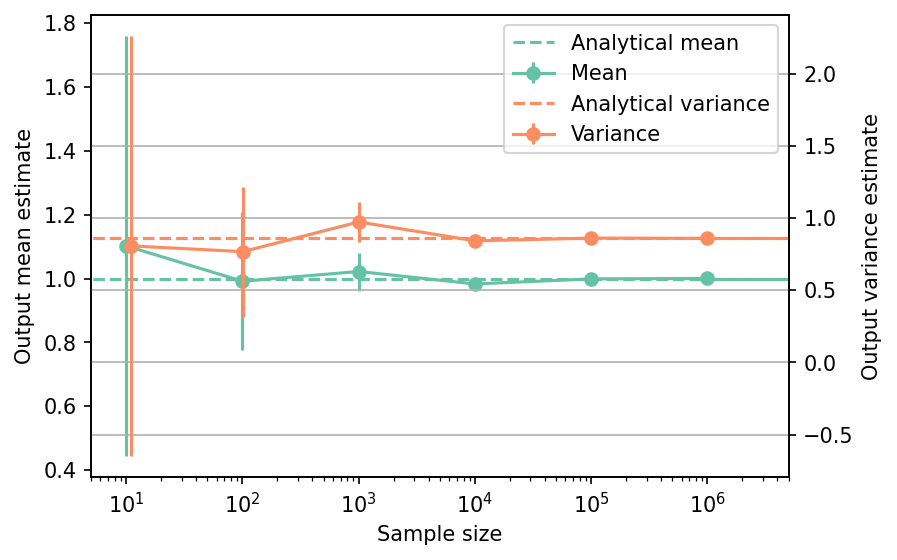

In [8]:
# --- Compute the mean and variance estimate
np.random.seed(42)
sample_sizes = np.array([1e1, 1e2, 1e3, 1e4, 1e5, 1e6], dtype=int)
mean_estimates = np.empty((len(sample_sizes), 50))
var_estimates = np.empty((len(sample_sizes), 50))

for i, sample_size in enumerate(sample_sizes):
    for j in range(50):
        xx_test = my_testfun.prob_input.get_sample(sample_size)
        yy_test = my_testfun(xx_test)
        mean_estimates[i, j] = np.mean(yy_test)
        var_estimates[i, j] = np.var(yy_test)

mean_estimates_errors = np.std(mean_estimates, axis=1)
var_estimates_errors = np.std(var_estimates, axis=1)

# --- Compute analytical mean and variance
params = my_testfun.parameters
mean_analytical = 1.0
var_analytical = np.prod((4 / 3 + 2 * params + params**2) / (1 + params)**2) - 1

# --- Plot the mean and variance estimates
fig, ax_1 = plt.subplots(figsize=(6,4))

ext_sample_sizes = np.insert(sample_sizes, 0, 1)
ext_sample_sizes = np.insert(ext_sample_sizes, -1, 5e6)

# --- Mean plot
ax_1.errorbar(
    sample_sizes,
    mean_estimates[:,0],
    yerr=2.0*mean_estimates_errors,
    marker="o",
    color="#66c2a5",
    label="Mean"
)
# Plot the analytical mean
ax_1.plot(
    ext_sample_sizes,
    np.repeat(mean_analytical, len(ext_sample_sizes)),
    linestyle="--",
    color="#66c2a5",
    label="Analytical mean",
)
ax_1.set_xlim([5, 5e6])
ax_1.set_xlabel("Sample size")
ax_1.set_ylabel("Output mean estimate")
ax_1.set_xscale("log");
ax_2 = ax_1.twinx()

# --- Variance plot
ax_2.errorbar(
    sample_sizes+1,
    var_estimates[:,0],
    yerr=2.0*var_estimates_errors,
    marker="o",
    color="#fc8d62",
    label="Variance",
)
# Plot the analytical variance
ax_2.plot(
    ext_sample_sizes,
    np.repeat(var_analytical, len(ext_sample_sizes)),
    linestyle="--",
    color="#fc8d62",
    label="Analytical variance",
)
ax_2.set_ylabel("Output variance estimate")

# Add the two plots together to have a common legend
ln_1, labels_1 = ax_1.get_legend_handles_labels()
ln_2, labels_2 = ax_2.get_legend_handles_labels()
ax_2.legend(ln_1 + ln_2, labels_1 + labels_2, loc=0)

plt.grid()
fig.set_dpi(150)

The tabulated results for each sample size is shown below.

In [9]:
from tabulate import tabulate

# --- Compile data row-wise
outputs = [
    [
        np.nan,
        mean_analytical,
        0.0,
        var_analytical,
        0.0,
        "Analytical",
    ]
]

for (
    sample_size,
    mean_estimate,
    mean_estimate_error,
    var_estimate,
    var_estimate_error,
) in zip(
    sample_sizes,
    mean_estimates[:,0],
    2.0*mean_estimates_errors,
    var_estimates[:,0],
    2.0*var_estimates_errors,
):
    outputs += [
        [
            sample_size,
            mean_estimate,
            mean_estimate_error,
            var_estimate,
            var_estimate_error,
            "Monte-Carlo",
        ],
    ]

header_names = [
    "Sample size",
    "Mean",
    "Mean error",
    "Variance",
    "Variance error",
    "Remark",
]

tabulate(
    outputs,
    numalign="center",
    stralign="center",
    tablefmt="html",
    floatfmt=(".1e", ".4e", ".4e", ".4e", ".4e", "s"),
    headers=header_names
)

'<table>\n<thead>\n<tr><th style="text-align: center;"> Sample size </th><th style="text-align: center;">   Mean   </th><th style="text-align: center;"> Mean error </th><th style="text-align: center;"> Variance </th><th style="text-align: center;"> Variance error </th><th style="text-align: center;">  Remark   </th></tr>\n</thead>\n<tbody>\n<tr><td style="text-align: center;">     nan     </td><td style="text-align: center;">1.0000e+00</td><td style="text-align: center;"> 0.0000e+00 </td><td style="text-align: center;">8.6088e-01</td><td style="text-align: center;">   0.0000e+00   </td><td style="text-align: center;">Analytical </td></tr>\n<tr><td style="text-align: center;">   1.0e+01   </td><td style="text-align: center;">1.1024e+00</td><td style="text-align: center;"> 6.5742e-01 </td><td style="text-align: center;">8.0829e-01</td><td style="text-align: center;">   1.4564e+00   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+02   </td><td style="text-align: center;">9.9178e-01</td><td style="text-align: center;"> 2.1635e-01 </td><td style="text-align: center;">7.6833e-01</td><td style="text-align: center;">   4.5027e-01   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+03   </td><td style="text-align: center;">1.0222e+00</td><td style="text-align: center;"> 5.9467e-02 </td><td style="text-align: center;">9.7429e-01</td><td style="text-align: center;">   1.4066e-01   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+04   </td><td style="text-align: center;">9.8333e-01</td><td style="text-align: center;"> 1.7392e-02 </td><td style="text-align: center;">8.4345e-01</td><td style="text-align: center;">   4.6349e-02   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+05   </td><td style="text-align: center;">9.9906e-01</td><td style="text-align: center;"> 4.9575e-03 </td><td style="text-align: center;">8.6216e-01</td><td style="text-align: center;">   1.4366e-02   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+06   </td><td style="text-align: center;">1.0006e+00</td><td style="text-align: center;"> 1.9133e-03 </td><td style="text-align: center;">8.6021e-01</td><td style="text-align: center;">   4.8536e-03   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n</tbody>\n</table>'

## References

```{bibliography}
:style: unsrtalpha
:filter: docname in docnames
```

[^location]: see Eqs. (23) and (24), p. 234 in {cite}`Saltelli1995`.

[^integral]: The expected value is the same as the integral over the domain
because the input is uniform in a unit hypercube.

[^default_dimension]: This default dimension applies to all variable dimension
test functions. It will be used if the `spatial_dimension` argument is not given.